# Feature Engineering

## Read in Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="whitegrid")
import pprint
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('./data/data.csv') 
df.head(10)

,datetime,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Add features

In [3]:
df['year'] = df['datetime'].str[0:4].astype(int)

# 0 for Monday to 5 for Saturday
df['dayofweek'] = [datetime.date(datetime.strptime(time, '%Y-%m-%d')).weekday() for time in df['datetime'].str[:10]]

In [4]:
df_clean = df.loc[:, ['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 
                            'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
df_clean.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011,1,5,1,1,0,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011,1,5,2,1,0,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011,1,5,3,1,0,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011,1,5,4,1,0,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011,1,5,5,1,0,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011,1,5,6,1,0,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011,1,5,7,1,0,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011,1,5,8,1,0,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011,1,5,9,1,0,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Feature Standardization

In [5]:
#Identify data types
df_clean.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday',
        'weather', 'casual', 'registered', 'count'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'humidity', 'windspeed'], dtype='object')}

In [6]:
# Standardize continuous variables
scaler = preprocessing.StandardScaler()
for col in ['temp', 'atemp', 'humidity', 'windspeed']:
    col_scale = scaler.fit(df_clean[[col]])
    df_clean[col] = scaler.fit_transform(df_clean[[col]], col_scale)

In [7]:
# Convert categorical variables 
df_clean = pd.get_dummies(df_clean, columns = ['season']) 
df_clean = pd.get_dummies(df_clean, columns = ['weather']) 

In [8]:
df_clean.head(10)

,year,month,dayofweek,hour,holiday,workingday,temp,atemp,humidity,windspeed,...,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011,1,5,0,0,0,-1.334648,-1.093281,0.947372,-1.553889,...,13,16,1,0,0,0,1,0,0,0
1,2011,1,5,1,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,32,40,1,0,0,0,1,0,0,0
2,2011,1,5,2,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,27,32,1,0,0,0,1,0,0,0
3,2011,1,5,3,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,10,13,1,0,0,0,1,0,0,0
4,2011,1,5,4,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,1,1,1,0,0,0,1,0,0,0
5,2011,1,5,5,0,0,-1.334648,-1.269602,0.636370,-0.821484,...,1,1,1,0,0,0,0,1,0,0
6,2011,1,5,6,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,0,2,1,0,0,0,1,0,0,0
7,2011,1,5,7,0,0,-1.542385,-1.269602,1.206542,-1.553889,...,2,3,1,0,0,0,1,0,0,0
8,2011,1,5,8,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,7,8,1,0,0,0,1,0,0,0
9,2011,1,5,9,0,0,-0.919172,-0.740638,0.688203,-1.553889,...,6,14,1,0,0,0,1,0,0,0


## Remove outliers

In [9]:
df_without_outliers = df_clean[np.abs(df_clean["count"] - df_clean["count"].mean()) <= (3 * df_clean["count"].std())] 
df_without_outliers.head(10)

,year,month,dayofweek,hour,holiday,workingday,temp,atemp,humidity,windspeed,...,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011,1,5,0,0,0,-1.334648,-1.093281,0.947372,-1.553889,...,13,16,1,0,0,0,1,0,0,0
1,2011,1,5,1,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,32,40,1,0,0,0,1,0,0,0
2,2011,1,5,2,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,27,32,1,0,0,0,1,0,0,0
3,2011,1,5,3,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,10,13,1,0,0,0,1,0,0,0
4,2011,1,5,4,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,1,1,1,0,0,0,1,0,0,0
5,2011,1,5,5,0,0,-1.334648,-1.269602,0.636370,-0.821484,...,1,1,1,0,0,0,0,1,0,0
6,2011,1,5,6,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,0,2,1,0,0,0,1,0,0,0
7,2011,1,5,7,0,0,-1.542385,-1.269602,1.206542,-1.553889,...,2,3,1,0,0,0,1,0,0,0
8,2011,1,5,8,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,7,8,1,0,0,0,1,0,0,0
9,2011,1,5,9,0,0,-0.919172,-0.740638,0.688203,-1.553889,...,6,14,1,0,0,0,1,0,0,0


In [10]:
print("Data size before removing outliers: ", df_clean.shape)
print("Data size after removing outliers: ", df_without_outliers.shape)

Data size before removing outliers:  (17379, 21)
Data size after removing outliers:  (17135, 21)


## Logarithm transformation

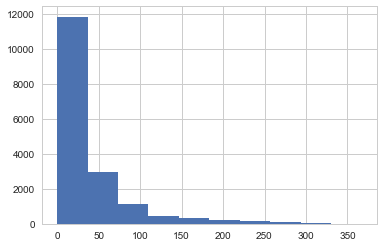

In [11]:
df_without_outliers['casual'].hist()

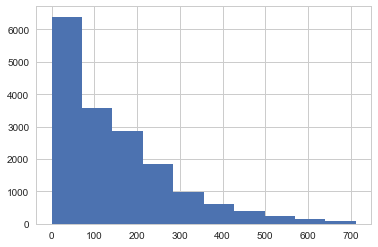

In [12]:
df_without_outliers['registered'].hist()

In [13]:
df2 = df_without_outliers.copy(deep=True)

df2['log_casual'] = np.log(df2['casual'] + 1)
df2['log_register'] = np.log(df2['registered'] + 1)
df2.head(10)

,year,month,dayofweek,hour,holiday,workingday,temp,atemp,humidity,windspeed,...,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,log_casual,log_register
0,2011,1,5,0,0,0,-1.334648,-1.093281,0.947372,-1.553889,...,1,0,0,0,1,0,0,0,1.386294,2.639057
1,2011,1,5,1,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,1,0,0,0,1,0,0,0,2.197225,3.496508
2,2011,1,5,2,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,1,0,0,0,1,0,0,0,1.791759,3.332205
3,2011,1,5,3,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,1,0,0,0,1,0,0,0,1.386294,2.397895
4,2011,1,5,4,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,1,0,0,0,1,0,0,0,0.000000,0.693147
5,2011,1,5,5,0,0,-1.334648,-1.269602,0.636370,-0.821484,...,1,0,0,0,0,1,0,0,0.000000,0.693147
6,2011,1,5,6,0,0,-1.438516,-1.181732,0.895539,-1.553889,...,1,0,0,0,1,0,0,0,1.098612,0.000000
7,2011,1,5,7,0,0,-1.542385,-1.269602,1.206542,-1.553889,...,1,0,0,0,1,0,0,0,0.693147,1.098612
8,2011,1,5,8,0,0,-1.334648,-1.093281,0.636370,-1.553889,...,1,0,0,0,1,0,0,0,0.693147,2.079442
9,2011,1,5,9,0,0,-0.919172,-0.740638,0.688203,-1.553889,...,1,0,0,0,1,0,0,0,2.197225,1.945910


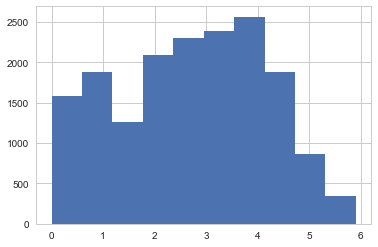

In [14]:
df2['log_casual'].hist()

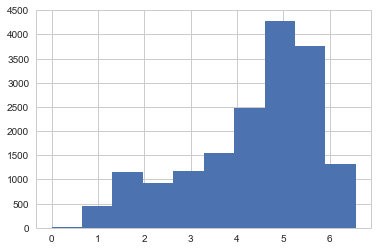

In [15]:
df2['log_register'].hist()

## Features Selection

### Feature correlation matrix

In [16]:
fea_cols=['year', 'month', 'dayofweek', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'workingday', 
          'weather_1', 'weather_2', 'weather_3', 'weather_4', 'temp', 'atemp', 'humidity', 'windspeed']

df2[fea_cols].corr()

,year,month,dayofweek,hour,season_1,season_2,season_3,season_4,holiday,workingday,weather_1,weather_2,weather_3,weather_4,temp,atemp,humidity,windspeed
year,1.000000,-0.015116,0.007853,-0.012779,0.018578,-0.001556,-0.008350,-0.008612,0.009197,-0.010974,0.003246,0.014551,-0.029125,0.004531,0.028069,0.026717,-0.076135,-0.010538
month,-0.015116,1.000000,0.004707,-0.007283,-0.564748,-0.316460,0.197023,0.688709,0.019273,-0.005771,-0.010566,0.013680,-0.002609,-0.021170,0.201214,0.207558,0.166179,-0.136065
dayofweek,0.007853,0.004707,1.000000,0.002003,0.011178,-0.010110,-0.000591,-0.000378,-0.191107,-0.702826,0.051123,-0.039659,-0.024699,-0.004564,-0.029712,-0.032441,-0.039893,0.004938
hour,-0.012779,-0.007283,0.002003,1.000000,0.012618,-0.003807,-0.008263,-0.000422,0.002005,-0.003460,0.033591,-0.047829,0.018463,0.000345,0.129256,0.125730,-0.271479,0.135875
season_1,0.018578,-0.564748,0.011178,0.012618,1.000000,-0.334473,-0.335657,-0.324793,0.032493,-0.025253,-0.032390,0.028142,0.009849,0.023095,-0.583650,-0.587168,-0.140678,0.118126
season_2,-0.001556,-0.316460,-0.010110,-0.003807,-0.334473,1.000000,-0.341973,-0.330905,-0.024751,0.016187,-0.011383,-0.001517,0.022486,-0.007725,0.147688,0.155035,0.002041,0.062998
season_3,-0.008350,0.197023,-0.000591,-0.008263,-0.335657,-0.341973,1.000000,-0.332077,-0.025242,0.015698,0.089641,-0.067185,-0.047088,-0.007752,0.643195,0.620361,0.022963,-0.092957
season_4,-0.008612,0.688709,-0.000378,-0.000422,-0.324793,-0.330905,-0.332077,1.000000,0.018110,-0.006996,-0.047012,0.041546,0.015148,-0.007501,-0.216929,-0.197635,0.116032,-0.088205
holiday,0.009197,0.019273,-0.191107,0.002005,0.032493,-0.024751,-0.025242,0.018110,1.000000,-0.251957,0.010023,0.004367,-0.024213,-0.002294,-0.025262,-0.028974,-0.012147,0.004302
workingday,-0.010974,-0.005771,-0.702826,-0.003460,-0.025253,0.016187,0.015698,-0.006996,-0.251957,1.000000,-0.044750,0.027138,0.033958,-0.000340,0.047616,0.047210,0.020795,-0.013031


In [17]:
#drop atemp due to high correlation with temp
fea_cols.remove('atemp')

### Feature importance for casual users

In [18]:
# For casual users
rf_cas = RandomForestRegressor(n_estimators = 10, oob_score = False)
rf_cas.fit(df2[fea_cols].values, df2['log_casual'].values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

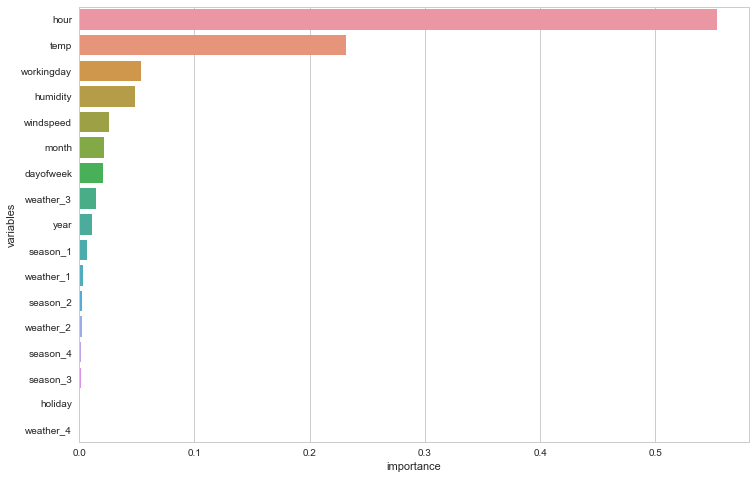

In [19]:
# Sort and plot feature importance 
features_imp_cas = pd.DataFrame(rf_cas.feature_importances_, columns = ['importance'])
features_imp_cas['variables'] = fea_cols

plt.figure(figsize=(12,8))
features_imp_cas = features_imp_cas.sort_values(by = 'importance', ascending = False)
ax = sns.barplot(x = 'importance', y = 'variables', data = features_imp_cas)

### Feature importance for registered users

In [20]:
rf_reg = RandomForestRegressor(n_estimators=10, oob_score=False)
rf_reg.fit(df2[fea_cols].values, df2['log_register'].values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

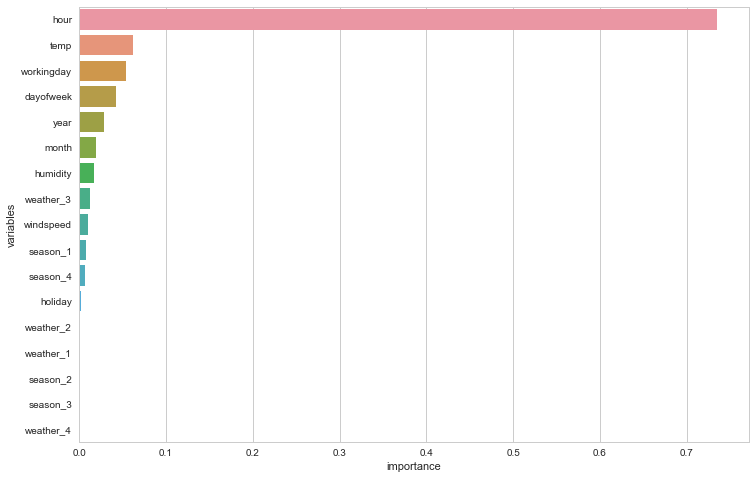

In [21]:
# Sort and plot feature importance 

features_imp_reg = pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])
features_imp_reg['variables'] = fea_cols

plt.figure(figsize=(12,8))
features_imp_reg = features_imp_reg.sort_values(by = 'importance', ascending = False)
ax = sns.barplot(x = 'importance', y = 'variables', data = features_imp_reg)

### Drop features with importance < 0.01

In [22]:
fea_cols_cas = features_imp_cas[features_imp_cas['importance'] > 0.01]

print("Selected features for casual users are", fea_cols_cas['variables'].values)

Selected features for casual users are ['hour' 'temp' 'workingday' 'humidity' 'windspeed' 'month' 'dayofweek'
 'weather_3' 'year']


In [23]:
fea_cols_reg = features_imp_reg[features_imp_reg['importance'] > 0.01]

print("Selected features for registered users are", fea_cols_reg['variables'].values)

Selected features for registered users are ['hour' 'temp' 'workingday' 'dayofweek' 'year' 'month' 'humidity'
 'weather_3' 'windspeed']


### Split the data into training and testing sets

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df2[fea_cols_cas['variables']], df2['log_casual'],
                                                        test_size=0.25, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2[fea_cols_reg['variables']], df2['log_register'],
                                                        test_size=0.25, random_state=42)

In [25]:
def RMSLE(pred, test):
    log1 = np.array([np.log(v + 1) for v in pred])
    log2 = np.array([np.log(v + 1) for v in test])    
    return np.sqrt(np.mean((log1 - log2) ** 2))

In [26]:
def plot_line(x, y, y_hat):
    y = np.array(np.exp(y)-1)
    y_hat = np.array(np.exp(y_hat) - 1)
    df = pd.DataFrame({"data": y, "pred": y_hat})
    df = df.sort_values(by = ['pred'])
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(np.arange(len(x)), df['data'],  label = 'data', color = 'blue')
    ax.plot(np.arange(len(x)), df['pred'],  label = 'prediction', color = 'red')
    ax.legend()

## Linear Regression

### Linear regression for casual users

In [27]:
# Model for casual users
l_cas = LinearRegression()
l_cas.fit(x_train1, y_train1)
pred1 = l_cas.predict(x_test1)

print('Coefficients: {}'.format(l_cas.coef_))
print('Intercept: {}'.format(l_cas.intercept_))

Coefficients: [ 0.0758052   0.72644661 -0.58573099 -0.32576464  0.01569816  0.02656007
  0.03193951 -0.31414072  0.20317197]
Intercept: -406.7059818927028


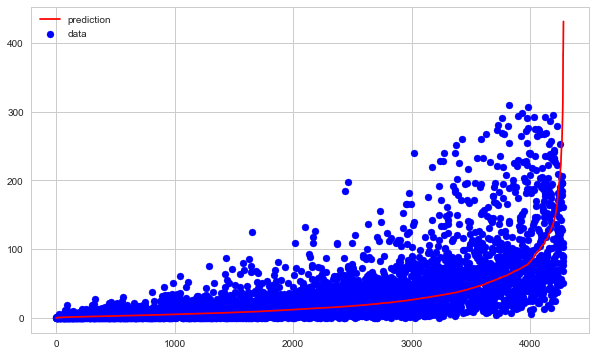

In [28]:
plot_line(x_test1, y_test1, pred1)

### Linear regression for registered users

In [29]:
# Model for casual users
l_reg = LinearRegression()
l_reg.fit(x_train2 ,y_train2)
pred2 = l_reg.predict(x_test2)

print('Coefficients: {}'.format(l_reg.coef_))
print('Intercept: {}'.format(l_reg.intercept_))

Coefficients: [ 0.09841035  0.32303396  0.19785675  0.03539748  0.40199336  0.04011404
 -0.20563153 -0.30711528  0.04125148]
Intercept: -805.8674709358723


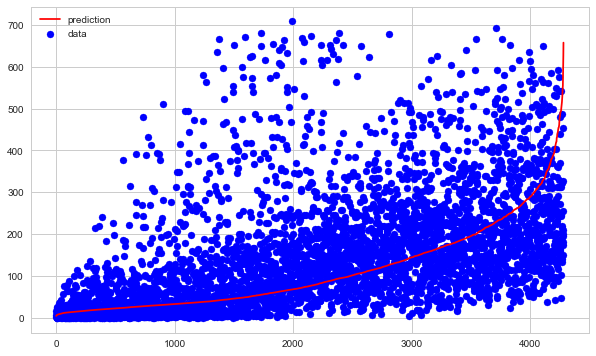

In [30]:
plot_line(x_test2, y_test2, pred2)

### RMSL Error

In [31]:
# Total demand
predictions = (np.exp(pred1) - 1) + (np.exp(pred2) - 1)
test_labels = (np.exp(y_test1) - 1) + (np.exp(y_test2) - 1)

#RMSL Error
rmsle_linear = RMSLE(predictions, test_labels)
rmsle_linear

1.0149658700716482

## Random Forest

### Training the algorithm 

In [32]:
# Predict for casual users
rf_cas.fit(x_train1, y_train1)
test_pred1 = rf_cas.predict(x_test1)

# Predict for registered users
rf_reg.fit(x_train2, y_train2)
test_pred2 = rf_reg.predict(x_test2)

# Total demand
predictions = (np.exp(test_pred1) - 1) + (np.exp(test_pred2) - 1)
test_labels = (np.exp(y_test1) - 1) + (np.exp(y_test2) - 1)

RMSLE(predictions, test_labels)

0.3409750659128751

### Tuning the model

In [33]:
# Tuning with different number of test and max_features

no_of_test=[10, 50, 100, 200, 500, 1000]
params_dict={'n_estimators':no_of_test, 'n_jobs':[-1], 'max_features':["auto", 'sqrt', 'log2']}

#Model for casual users
rf1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params_dict, scoring = 'neg_mean_squared_log_error')
rf1.fit(x_train1,y_train1)
pred1 = rf1.predict(x_test1)

#Model for registered users
rf2 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params_dict, scoring = 'neg_mean_squared_log_error')
rf2.fit(x_train2,y_train2)
pred2 = rf2.predict(x_test2)

print(rf1.best_params_, rf2.best_params_)

{'max_features': 'log2', 'n_estimators': 1000, 'n_jobs': -1} {'max_features': 'auto', 'n_estimators': 1000, 'n_jobs': -1}


### RMSL Error

In [34]:
predictions = (np.exp(pred1) - 1) + (np.exp(pred2) - 1)
test_labels = (np.exp(y_test1) - 1) + (np.exp(y_test2) - 1)
rmsle_rf = RMSLE(predictions, test_labels)
rmsle_rf

0.3268835356026942

## KNN Regression

In [35]:
# Predict for casual users
knn_cas = KNeighborsRegressor()
knn_cas.fit(x_train1, y_train1)
test_pred1 = knn_cas.predict(x_test1)

# Predict for registered users
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train2, y_train2)
test_pred2 = knn_reg.predict(x_test2)

# Total demand
predictions = (np.exp(test_pred1) - 1) + (np.exp(test_pred2) - 1)
test_labels = (np.exp(y_test1) - 1) + (np.exp(y_test2) - 1)

rmsle_knn = RMSLE(predictions, test_labels)
rmsle_knn

0.39216166721213835

## Adaboost Regression

In [36]:
# Predict for casual users
ada_cas = AdaBoostRegressor()
ada_cas.fit(x_train1, y_train1)
test_pred1 = ada_cas.predict(x_test1)

# Predict for registered users
ada_reg = AdaBoostRegressor()
ada_reg.fit(x_train2, y_train2)
test_pred2 = ada_reg.predict(x_test2)

# Total demand
predictions = (np.exp(test_pred1) - 1) + (np.exp(test_pred2) - 1)
test_labels = (np.exp(y_test1) - 1) + (np.exp(y_test2) - 1)

rmsle_ada = RMSLE(predictions, test_labels)
rmsle_ada

0.6623989270064352

## Model Comparison

In [37]:
rmsle = pd.DataFrame([rmsle_linear,  rmsle_rf, rmsle_knn, rmsle_ada],
                     columns=['RMSLE'],
                     index=['linear regression', 'Random Forest', 'KNN regression', 'AdaBoost Regression'])
rmsle

,RMSLE
linear regression,1.014966
Random Forest,0.326884
KNN regression,0.392162
AdaBoost Regression,0.662399


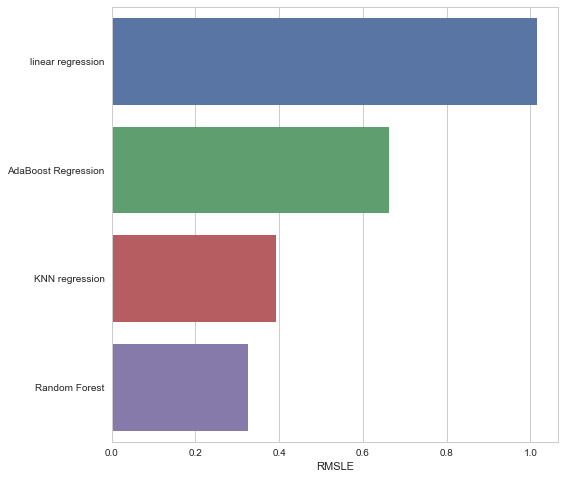

In [38]:
plt.figure(figsize=(8,8))
rmsle = rmsle.sort_values(by = ['RMSLE'], ascending = False)
ax = sns.barplot(x = 'RMSLE', y = rmsle.index, data = rmsle)